In [1]:
from pycelonis import get_celonis
from PYCELONIS.configurations import *
from pycelonis import pql
import pandas as pd
import numpy
import datetime
from tabulate import tabulate


class Celonis:
    def __init__(self):

        self.url = load_property('CELONISCONNECTION', 'celonis_url')
        self.api_key = load_property('CELONISCONNECTION', 'celonis_api_key')
        self.celonis = get_celonis(url=self.url, api_token=self.api_key, key_type="APP_KEY")
        self.data_pool = "SAP ECC O2C"
        self.data_model = "O2C | DataFlow"


    def print_datamodel_tables(self):
        dm = self.celonis.datamodels.find(self.data_model)
        return(dm.tables)
    

    def get_data(self, table_name):
        #This method takes a table -tabname parameter- from a celonis data model.
        #query += pql.PQLFilter("tab.colname == value")
        datamodel = self.celonis.datamodels.find(self.data_model)
        columns = datamodel.tables.find(table_name).columns
        q = pql.PQL()
        for cols in range(len(columns)):
            q += pql.PQLColumn(query = table_name+ f".{columns[cols]['name']}", name =  columns[cols]['name'].upper())#.replace("/","").replace(" ","").replace("_",""))
        DF = datamodel._get_data_frame(q, chunksize = 1000000)
        return(DF)
    
    def get_data_id(self, table_name):
        datamodel = self.celonis.datamodels.find(self.data_model)
        table = datamodel.tables.find(table_name)
        columns = datamodel.tables.find(table_name).columns
        q = pql.PQL()
        for cols in range(len(columns)):
            q += pql.PQLColumn(query = table.name + f".{columns[cols]['name']}", name =  columns[cols]['name'].upper())
        DF = datamodel._get_data_frame(q, chunksize = 1000000)
        return(DF)


   #def get_data_array(self, array):
   #    datamodel = self.celonis.datamodels.find(self.data_model)
   #    col_array = array
   #    q = pql.PQL()
   #    for cols in range(len(col_array)):
   #        q += pql.PQLColumn( query= col_array[cols], name = f"{col_array[cols].split('.')[1]}")
   #    DF = datamodel._get_data_frame(q,chunksize = 1000000)
   #    return(DF)
   #

    def get_data_array(self, array):
        datamodel = self.celonis.datamodels.find(self.data_model)
        col_array = array
        q = pql.PQL()
        for cols in range(len(col_array)):
            q += pql.PQLColumn(query= col_array[cols], name = f"{col_array[cols]}")
        DF = datamodel._get_data_frame(q,chunksize = 1000000)
        return(DF)
    
    def get_cols(self,array):
        all_cols = []
        datamodel = self.celonis.datamodels.find(self.data_model)
        for i in array:
            data = datamodel.tables.find(i).columns
            cols = numpy.array([d['name'] for d in data])
            all_cols.append(cols)

        return(all_cols)
    
    #def get_data_array_CDPOS(self, array):
    #    datamodel = self.celonis.datamodels.find(self.data_model)
    #    col_array = array
    #    q = pql.PQL()
    #    for cols in range(len(col_array)):
    #        q += pql.PQLColumn( query= col_array[cols], name = f"{col_array[cols].split('.')[1]}")
    #    q += pql.PQLFilter("CDPOS.TABNAME IN ('VBAK','VBAP','FPLT') AND CDPOS.MANDANT in ('005')")
    #    DF = datamodel._get_data_frame(q,chunksize = 1000000)
    #    return(DF)
    
    def get_data_array_filter(self, array, filter):
        datamodel = self.celonis.datamodels.find(self.data_model)
        col_array = array
        q = pql.PQL()
        for cols in range(len(col_array)):
            q += pql.PQLColumn( query= col_array[cols], name = f"{col_array[cols]}") # .split('.')[1]}")
        q += pql.PQLFilter(filter)
        DF = datamodel._get_data_frame(q,chunksize = 1000000)
        return(DF)
    
    def get_cols_dict(self,array):
        cols = {}
        datamodel = self.celonis.datamodels.find(self.data_model)
        for i in array:
            data = datamodel.tables.find(i).columns
            col_names = [d['name'] for d in data]
            cols[i] = col_names

        return(cols)
    
c = Celonis()

[2023-11-19 19:27:08] INFO: Initial connect successful! You are using an Application Key. PyCelonis Version: 1.7.0


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 1.7.1#sha256=1a33bea4a3fe5bf28b39faa561448594f768b243c3260800b7bddf5b80b46d2e is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pkg_resources\_vendor\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 1.7.4#sha256=54e0ebbc94aa5ca988ffd064788dc2d76e3c5acc968e21bf0e92135c19d4d4de is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Program Files\WindowsApp

[2023-11-19 19:27:08] INFO: Your key has following permissions:
[
    {
        "permissions": [],
        "serviceName": "semantic-layer"
    },
    {
        "permissions": [],
        "serviceName": "task-mining"
    },
    {
        "permissions": [],
        "serviceName": "team"
    },
    {
        "permissions": [],
        "serviceName": "process-analytics"
    },
    {
        "permissions": [],
        "serviceName": "transformation-center"
    },
    {
        "permissions": [],
        "serviceName": "storage-manager"
    },
    {
        "permissions": [
            "$ACCESS_CHILD"
        ],
        "serviceName": "event-collection"
    },
    {
        "permissions": [],
        "serviceName": "ml-workbench"
    },
    {
        "permissions": [],
        "serviceName": "package-manager"
    },
    {
        "permissions": [],
        "serviceName": "ems-automation"
    },
    {
        "permissions": [],
        "serviceName": "compute-live"
    },
    {
        "permi

In [2]:
c.print_datamodel_tables()

[
<DatamodelTable, id 5ce0c54c-b95b-44f5-8688-7b59f62e3c64, name DD07T>,
<DatamodelTable, id 554b7b8f-882b-4425-bf9b-6341ff888c84, name USR02>,
<DatamodelTable, id e8b6d8de-87a0-4c7c-aa51-883f581d1752, name CDHDR>,
<DatamodelTable, id f10a8a63-5e7e-4f7d-a7cf-678cad93aad9, name CDPOS>,
<DatamodelTable, id 6626d582-2b42-424f-9981-7e39c974cd3f, name VBEP_EBAN_LINK>,
<DatamodelTable, id ae5356b7-ba7a-457a-bf75-fd34e0b6f429, name EBAN>,
<DatamodelTable, id 3fb82cbd-b5a7-446e-a9b4-6e69788cf870, name BSEG>,
<DatamodelTable, id 00e46bbc-dfd1-4c55-837e-200b4eee11b4, name AUFK>,
<DatamodelTable, id df6ee693-b422-47a1-a9f1-aee2faa2d456, name PC_to_BG_YCON1>,
<DatamodelTable, id dd02a803-d285-4152-887b-0c40c58506a0, name VBAP>,
<DatamodelTable, id 115f2dfe-0e8c-45a0-8757-4d16686bfd48, name KNKK>,
<DatamodelTable, id 7ccf429c-e138-4b0e-92de-1263d44aee0b, name NAST>,
<DatamodelTable, id c131294d-a3b7-49ea-ae09-b23237c27fbd, name KNB1>,
<DatamodelTable, id 64c91412-8a25-47d2-91c6-b5dfc0dbc0a2, name V

add_item DONE
changes_business_data DONE
changes_schedule_line DONE
changes_SO_header DONE
changes_so_item DONE
create_so DONE
create_so_item DONE
delivery_docs DONE
set_billing_block DONE
Ship_to_party DONE

In [3]:
vbap_array = ['VBAP.MANDT',"VBAP.ERDAT","VBAP.ERZET","VBAP.POSNR","VBAP.ERNAM","VBAP.NETWR","VBAP.MATNR","VBAP.WERKS","VBAP.ABGRU","VBAP.VBELN"]
vbak_array = ["VBAK.MANDT","VBAK.VBELN","VBAK.VBTYP","VBAK.OBJNR","VBAK.WAERK","VBAK.BUKRS_VF","VBAK.KUNNR","VBAK.KKBER","VBAK.LIFSK","VBAK.FAKSK"]
USR02_array = ['USR02.MANDT','USR02.BNAME','USR02.USTYP']
CDPOS_array = ['CDPOS.MANDANT','CDPOS.TABKEY',"CDPOS.OBJECTCLAS",'CDPOS.OBJECTID','CDPOS.CHANGENR','CDPOS.TABNAME','CDPOS.FNAME','CDPOS.CHNGIND', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW']
CDHDR_array = ['CDHDR.MANDANT','CDHDR.TCODE',"CDHDR.OBJECTCLAS", "CDHDR.OBJECTID","CDHDR.CHANGENR", "CDHDR.UDATE", "CDHDR.UTIME", "CDHDR.USERNAME"]
vbep_array = ['VBEP.MANDT', 'VBEP.VBELN', 'VBEP.POSNR', 'VBEP.BMENG']
DD07T_array = ['DD07T.DOMNAME','DD07T.DDLANGUAGE','DD07T.DOMVALUE_L','DD07T.DDTEXT']
FPLA_FPLT_array = ['FPLA_FPLT.VBELN']
O2C_VBFA_V_array = ['O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV','O2C_VBFA_V.ERZET']
LIPS_array =  ['O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR', 'O2C_LIPS.ERDAT', 'O2C_LIPS.ERZET']
LIKP_array = ['LIKP.MANDT', 'LIKP.VBELN', 'LIKP.ERNAM', 'LIKP.VBTYP', 'LIKP.TCODE']

In [12]:
import pandas as pd

# Define the lists
vbap_array = ['VBAP.MANDT', 'VBAP.ERDAT', 'VBAP.ERZET', 'VBAP.POSNR', 'VBAP.ERNAM', 'VBAP.NETWR', 'VBAP.MATNR', 'VBAP.WERKS', 'VBAP.ABGRU', 'VBAP.VBELN']
vbak_array = ['VBAK.MANDT', 'VBAK.VBELN', 'VBAK.VBTYP', 'VBAK.OBJNR', 'VBAK.WAERK', 'VBAK.BUKRS_VF', 'VBAK.KUNNR', 'VBAK.KKBER', 'VBAK.LIFSK', 'VBAK.FAKSK']
USR02_array = ['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']
CDPOS_array = ['CDPOS.MANDANT', 'CDPOS.TABKEY', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR', 'CDPOS.TABNAME', 'CDPOS.FNAME', 'CDPOS.CHNGIND', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW']
CDHDR_array = ['CDHDR.MANDANT', 'CDHDR.TCODE', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.USERNAME']
vbep_array = ['VBEP.MANDT', 'VBEP.VBELN', 'VBEP.POSNR', 'VBEP.BMENG']
DD07T_array = ['DD07T.DOMNAME', 'DD07T.DDLANGUAGE', 'DD07T.DOMVALUE_L', 'DD07T.DDTEXT']
FPLA_FPLT_array = ['FPLA_FPLT.VBELN']
O2C_VBFA_V_array = ['O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV', 'O2C_VBFA_V.ERZET']
LIPS_array = ['O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR', 'O2C_LIPS.ERDAT', 'O2C_LIPS.ERZET']
LIKP_array = ['LIKP.MANDT', 'LIKP.VBELN', 'LIKP.ERNAM', 'LIKP.VBTYP', 'LIKP.TCODE']

# Create DataFrames
vbap = pd.DataFrame(columns=vbap_array)
vbak = pd.DataFrame(columns=vbak_array)
USR02 = pd.DataFrame(columns=USR02_array)
CDPOS = pd.DataFrame(columns=CDPOS_array)
CDHDR = pd.DataFrame(columns=CDHDR_array)
VBEP = pd.DataFrame(columns=vbep_array)
DD07T = pd.DataFrame(columns=DD07T_array)
FPLA_FPLT = pd.DataFrame(columns=FPLA_FPLT_array)
O2C_VBFA_V = pd.DataFrame(columns=O2C_VBFA_V_array)
LIPS = pd.DataFrame(columns=LIPS_array)
LIKP = pd.DataFrame(columns=LIKP_array)

In [18]:
#vbap = c.get_data_array(vbap_array)
vbap['VBAP.ERDAT'] = pd.to_datetime(vbap['VBAP.ERDAT'])  # Convert 'ERDAT' column to datetime
vbap = vbap[(vbap['VBAP.ERDAT'] <= '2021-01-05') & (vbap['VBAP.ERDAT'] >= '2021-01-01')]

In [4]:
vbak = c.get_data_array(vbak_array)

[2023-11-19 19:20:20] INFO: PQL Export started...
[2023-11-19 19:20:21] INFO: PQL Export status: FAILED


PyCelonisHTTPError: Export failed. Status: FAILED 

 Query: ['TABLE( VBAK.MANDT AS "VBAK.MANDT", VBAK.VBELN AS "VBAK.VBELN", VBAK.VBTYP AS "VBAK.VBTYP", VBAK.OBJNR AS "VBAK.OBJNR", VBAK.WAERK AS "VBAK.WAERK", VBAK.BUKRS_VF AS "VBAK.BUKRS_VF", VBAK.KUNNR AS "VBAK.KUNNR", VBAK.KKBER AS "VBAK.KKBER", VBAK.LIFSK AS "VBAK.LIFSK", VBAK.FAKSK AS "VBAK.FAKSK" ) NOLIMIT;'] 

 Message Could not connect to Process Mining Engine. Please check if the data model is loaded. 

 Export ID: 666f7fd8-d84f-470d-8a45-da3858dd436e

VBAK_VBAP = pd.merge(
    vbak[['MANDT', 'VBELN', 'VBTYP', 'OBJNR', 'WAERK', 'BUKRS_VF', 'KUNNR', 'KKBER', 'LIFSK', 'FAKSK']],
    vbap[['MANDT', 'VBELN', 'ERDAT', 'ERZET', 'POSNR', 'ERNAM', 'NETWR', 'MATNR', 'WERKS', 'ABGRU']],
    how='inner',
    on=['MANDT', 'VBELN']
).drop_duplicates()
VBAK_VBAP['_CASE_KEY'] = VBAK_VBAP['MANDT'] + VBAK_VBAP['VBELN'] + VBAK_VBAP['POSNR']
VBAK_VBAP['TABKEY_VBAK'] = VBAK_VBAP['MANDT'] + VBAK_VBAP['VBELN']
VBAK_VBAP['EVENTTIME']= pd.to_datetime(VBAK_VBAP["ERDAT"].dt.date.astype(str) + ' ' + VBAK_VBAP["ERZET"].dt.strftime('%H:%M:%S'))

In [19]:
VBAK_VBAP = pd.merge(
    vbak[['VBAK.MANDT', 'VBAK.VBELN', 'VBAK.VBTYP', 'VBAK.OBJNR', 'VBAK.WAERK', 'VBAK.BUKRS_VF', 'VBAK.KUNNR', 'VBAK.KKBER', 'VBAK.LIFSK', 'VBAK.FAKSK']],
    vbap[['VBAP.MANDT', 'VBAP.VBELN', 'VBAP.ERDAT', 'VBAP.ERZET', 'VBAP.POSNR', 'VBAP.ERNAM', 'VBAP.NETWR', 'VBAP.MATNR', 'VBAP.WERKS', 'VBAP.ABGRU']],
    how='inner',
    left_on=['VBAK.MANDT', 'VBAK.VBELN'],
    right_on=['VBAP.MANDT', 'VBAP.VBELN']
).drop_duplicates()

In [20]:
VBAK_VBAP['VBAK_VBAP._CASE_KEY'] = VBAK_VBAP['VBAK.MANDT'] + VBAK_VBAP['VBAK.VBELN'] + VBAK_VBAP['VBAP.POSNR']
VBAK_VBAP['VBAK_VBAP.TABKEY_VBAK'] = VBAK_VBAP['VBAK.MANDT'] + VBAK_VBAP['VBAK.VBELN']
VBAK_VBAP['VBAK_VBAP.EVENTTIME']= pd.to_datetime(VBAK_VBAP["VBAP.ERDAT"].dt.date.astype(str) + ' ' + VBAK_VBAP["VBAP.ERZET"].dt.strftime('%H:%M:%S'))

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
USR02 = c.get_data_array(USR02_array)

[2023-09-21 20:52:12] INFO: PQL Export started...
[2023-09-21 20:52:13] INFO: PQL Export status: DONE


In [ ]:
VBEP =  c.get_data_array(vbep_array)

[2023-09-21 20:52:15] INFO: PQL Export started...
[2023-09-21 20:52:17] INFO: PQL Export status: DONE


In [ ]:
VBEP = VBEP.sample(100000)

In [ ]:
CDPOS =  c.get_data_array_filter(CDPOS_array,filter="(CDPOS.TABNAME IN ('VBAK','VBAP','FPLT')) AND (CDPOS.MANDANT in ('000'))")

[2023-09-21 20:53:08] INFO: PQL Export started...
[2023-09-21 20:53:13] INFO: PQL Export status: DONE


In [ ]:
#CDHDR =  c.get_data_array(CDHDR_array)

In [ ]:
CDHDR =  c.get_data_array_filter(CDHDR_array,filter="CDHDR.MANDANT IN ('000')")
#CDHDR = CDHDR.sample(100000)

[2023-09-21 20:53:15] INFO: PQL Export started...
[2023-09-21 20:53:16] INFO: PQL Export status: DONE


In [22]:
CDPOS_CDHDR = pd.merge(
    CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.UDATE', 'CDHDR.USERNAME',"CDHDR.TCODE","CDHDR.UTIME"]],
    CDPOS[['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS','CDPOS.OBJECTID','CDPOS.CHANGENR','CDPOS.FNAME', 'CDPOS.TABNAME', 'CDPOS.TABKEY', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW', 'CDPOS.CHNGIND']],
    how='inner',
    left_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR'],
    right_on=['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS','CDPOS.OBJECTID','CDPOS.CHANGENR']
)

#CDPOS_CDHDR = CDPOS_CDHDR[
#    (CDPOS_CDHDR['CHNGIND'] == 'U') &
#    (CDPOS_CDHDR['UDATE'].notnull()) &
#    (CDPOS_CDHDR['TABNAME'].isin(['VBAK', 'VBAP', 'FPLT']))
#]
#
CDPOS_CDHDR['CDPOS_CDHDR.EVENTTIME'] = pd.to_datetime(CDPOS_CDHDR['CDHDR.UDATE']) + pd.to_timedelta(CDPOS_CDHDR['CDHDR.UTIME'].astype(str))

#TMP_O2C_CDHDR_CDPOS = TMP_O2C_CDHDR_CDPOS[['MANDANT', 'FNAME', 'TABNAME', 'TABKEY', 'VALUE_OLD', 'VALUE_NEW', 'EVENTTIME', 'CHANGENR', 'TCODE', 'OBJECTCLAS', 'OBJECTID', 'USERNAME']]

In [10]:
#DD07T =  c.get_data_id('5ce0c54c-b95b-44f5-8688-7b59f62e3c64')
DD07T = pd.DataFrame(columns=DD07T_array)

In [11]:
#FPLA_FPLT =  c.get_data_array(FPLA_FPLT_array)
FPLA_FPLT = pd.DataFrame(columns=FPLA_FPLT_array)

In [ ]:
LIPS =  c.get_data_array(LIPS_array)

[2023-09-21 20:53:18] INFO: PQL Export started...
[2023-09-21 20:53:20] INFO: PQL Export status: DONE


In [ ]:
LIKP = c.get_data_array(LIKP_array)

[2023-09-21 20:53:43] INFO: PQL Export started...
[2023-09-21 20:53:44] INFO: PQL Export status: DONE


In [15]:
O2C_VBFA_V = c.get_data_array(O2C_VBFA_V_array)

[2023-11-19 19:33:22] INFO: PQL Export started...
[2023-11-19 19:33:22] INFO: PQL Export status: FAILED


PyCelonisHTTPError: Export failed. Status: FAILED 

 Query: ['TABLE( O2C_VBFA_V.MANDT AS "O2C_VBFA_V.MANDT", O2C_VBFA_V.VBELV AS "O2C_VBFA_V.VBELV", O2C_VBFA_V.POSNV AS "O2C_VBFA_V.POSNV", O2C_VBFA_V.ERZET AS "O2C_VBFA_V.ERZET" ) NOLIMIT;'] 

 Message Could not connect to Process Mining Engine. Please check if the data model is loaded. 

 Export ID: bd52728d-f195-4a4a-b4b2-0a8c59e255bf

MILESTONES

create_so

create_so = pd.merge(
    pd.merge(
        VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR', 'ERNAM']],
        vbak[['MANDT', 'VBELN', 'ERDAT', 'ERZET']],
        how='left',
        on=['MANDT', 'VBELN']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDT', 'ERNAM'],
    right_on=['MANDT', 'BNAME']
)

create_so['ACTIVITY_EN'] = 'Create Sales Order'
create_so['EVENTTIME'] = pd.to_datetime(create_so['ERDAT']) + pd.to_timedelta(create_so['ERZET'])
create_so['_SORTING'] = 11
create_so['_ACTIVITY_KEY'] = create_so['MANDT'] + create_so['VBELN']

create_so = create_so[['ACTIVITY_EN', 'EVENTTIME', '_SORTING', 'USER_NAME', 'USER_TYPE', 'MANDT', 'VBELN', 'POSNR', '_ACTIVITY_KEY']]


In [24]:
create_so = pd.merge(
    VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAK.VBELN', 'VBAP.POSNR','VBAP.ERDAT','VBAP.ERZET','VBAP.ERNAM']],
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['VBAK.MANDT', 'VBAP.ERNAM'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)        


create_so['create_so.ACTIVITY_EN'] = 'Create Sales Order'
create_so['create_so._SORTING'] = 11
create_so['create_so._ACTIVITY_KEY'] = create_so['VBAK.MANDT'] + create_so['VBAK.VBELN']
create_so['create_so.EVENTTIME'] = create_so.apply(lambda row: datetime.datetime.combine(row['VBAP.ERDAT'].date(), row['VBAP.ERZET'].time()), axis=1)


In [25]:
#VBAK_VBAP.loc[:,~VBAK_VBAP.columns.duplicated()]

create_so_item

create_so_item = create_so[["_CASE_KEY", "USER_NAME","USTYP", "MANDT", "VBELN", "POSNR",'EVENTTIME']]
create_so_item = pd.merge(create_so_item, CDPOS_CDHDR, left_on=['_CASE_KEY'],right_on=["TABKEY"], how='inner')
create_so_item['ACTIVITY_EN'] = 'CreateSOItem'
create_so_item = create_so_item[["_CASE_KEY","ACTIVITY_EN","USER_NAME","USTYP","MANDT", "VBELN", "POSNR","EVENTTIME","TCODE"]]
create_so_item['_SORTING'] = 19
create_so_item["_ACTIVITY_KEY"] = create_so_item['MANDT'] + create_so_item['VBELN'] + create_so_item['POSNR']

create_so_item = pd.merge(
    pd.merge(
        VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR', 'ERDAT', 'ERZET', 'ERNAM']],
        USR02[['MANDT', 'BNAME', 'USTYP']],
        how='left',
        left_on=['MANDT', 'ERNAM'],
        right_on=['MANDT', 'BNAME']
    ),
    CDPOS_CDHDR.groupby('TABKEY')['TCODE'].max().reset_index(),
    how='left',
    left_on=['_CASE_KEY'],
    right_on=['TABKEY']
)

create_so_item['ACTIVITY_DE'] = 'Lege Auftragsposition an'
create_so_item['ACTIVITY_EN'] = 'CreateSOItem'
create_so_item['EVENTTIME'] = create_so_item['ERDAT'].astype('datetime64') + create_so_item['ERZET'].astype('timedelta64[s]')
create_so_item['_SORTING'] = 19
create_so_item['_ACTIVITY_KEY'] = create_so_item['MANDT'] + create_so_item['VBELN'] + create_so_item['POSNR']

result = result.rename(columns={
    '_CASE_KEY': '_CASE_KEY',
    'ACTIVITY_DE': 'ACTIVITY_DE',
    'ACTIVITY_EN': 'ACTIVITY_EN',
    'EVENTTIME': 'EVENTTIME',
    '_SORTING': '_SORTING',
    'USER_NAME': 'USER_NAME',
    'USER_TYPE': 'USER_TYPE',
    'MANDT': 'MANDT',
    'VBELN': 'VBELN',
    'POSNR': 'POSNR',
    'TRANSACTION_CODE': 'TRANSACTION_CODE',
    '_ACTIVITY_KEY': '_ACTIVITY_KEY'
})
#result = result[['ACTIVITY_DE', 'ACTIVITY_EN', 'EVENTTIME', '_SORTING', 'USER_NAME', 'USER_TYPE', 'MANDT', 'VBELN', 'POSNR', 'TRANSACTION_CODE', '_ACTIVITY_KEY']]


In [28]:
create_so_item = pd.merge(
    pd.merge(
        VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR','VBAP.ERDAT','VBAP.ERZET','VBAP.ERNAM']],
        USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
        how='left',
        left_on=['VBAK.MANDT', 'VBAP.ERNAM'],
        right_on=['USR02.MANDT', 'USR02.BNAME']
    ),
    CDPOS_CDHDR.groupby('CDPOS.TABKEY')['CDHDR.TCODE'].max().reset_index(),
    how='left',
    left_on=['VBAK_VBAP._CASE_KEY'],
    right_on=['CDPOS.TABKEY']
)

create_so_item['create_so_item.ACTIVITY_DE'] = 'Lege Auftragsposition an'
create_so_item['create_so_item.ACTIVITY_EN'] = 'CreateSOItem'
create_so_item['create_so_item.EVENTTIME'] = create_so_item.apply(lambda row: datetime.datetime.combine(row['VBAP.ERDAT'].date(), row['VBAP.ERZET'].time()), axis=1)
create_so_item['create_so_item._SORTING'] = 19
create_so_item['create_so_item._ACTIVITY_KEY'] = create_so_item['VBAK.MANDT'] + create_so_item['VBAP.VBELN'] + create_so_item['VBAP.POSNR']

ADD_ITEM

add_item = VBAK_VBAP[['_CASE_KEY', '"MANDANT"', '"VBELN"', '"POSNR"']].rename(columns={'_CASE_KEY': 'ACTIVITY_KEY', '"MANDANT"': 'MANDT'})
add_item = pd.merge(add_item, CDPOS, how='inner', left_on='ACTIVITY_KEY', right_on='TABKEY')
add_item = add_item[add_item['CHNGIND'] == 'Insert'] 
add_item = add_item[add_item['FNAME'] == 'KEY'] 
add_item = add_item[add_item['TABNAME'] == 'VBAP']
add_item = pd.merge(add_item, CDHDR, how='inner', on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR'])
add_item = pd.merge(add_item, USR02, how='left', left_on=['MANDANT', 'USERNAME'], right_on=['MANDT', 'BNAME'])
add_item = add_item[['ACTIVITY_KEY', '_CASE_KEY', 'ACTIVITY_EN', 'EVENTTIME', 'USER_NAME', 'USER_TYPE',
                  'CHANGED_TABLE', 'CHANGED_FIELD', 'CHANGE_NUMBER', 'TRANSACTION_CODE', 'MANDT', 'VBELN', 'POSNR']]

add_item = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR']],
            CDPOS[['MANDANT',"OBJECTCLAS","OBJECTID","CHANGENR",'TABKEY', 'FNAME', 'CHNGIND','TABNAME']],
            how='inner',
            left_on='_CASE_KEY',
            right_on='TABKEY'
        ),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TCODE', 'USERNAME']],
        how='inner',
        on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

add_item['ACTIVITY_EN'] = add_item.apply(lambda row: 'Change: Item add' if row['FNAME'] == 'KEY' and row['CHNGIND'] == 'I' else None, axis=1)
add_item['_ACTIVITY_KEY'] = add_item['MANDANT'] + add_item['OBJECTCLAS'] + add_item['OBJECTID'] + add_item['CHANGENR']

add_item = add_item.rename(columns={
    'USERNAME': 'USER_NAME',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
    'CHANGENR': 'CHANGE_NUMBER',
    'TCODE': 'TRANSACTION_CODE',
    'MANDT_x': 'MANDT',
})

In [30]:
add_item = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR']],
            CDPOS[['CDPOS.MANDANT',"CDPOS.OBJECTCLAS","CDPOS.OBJECTID","CDPOS.CHANGENR",'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND','CDPOS.TABNAME']],
            how='inner',
            left_on='VBAK_VBAP._CASE_KEY',
            right_on='CDPOS.TABKEY'
        ),
        CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.TCODE', 'CDHDR.USERNAME']],
        how='inner',
        left_on=['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR'],
        right_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

add_item['add_item.ACTIVITY_EN'] = add_item.apply(lambda row: 'Change: Item add' if row['CDPOS.FNAME'] == 'KEY' and row['CDPOS.CHNGIND'] == 'I' else None, axis=1)
add_item['add_item._ACTIVITY_KEY'] = add_item['CDPOS.MANDANT'] + add_item['CDPOS.OBJECTCLAS'] + add_item['CDPOS.OBJECTID'] + add_item['CDPOS.CHANGENR']

Ship_to_Party

ship_to_party = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['MANDT', '_CASE_KEY', 'VBELN', 'POSNR']],
            CDPOS[["MANDANT","OBJECTCLAS","OBJECTID","CHANGENR","TABNAME","TABKEY","FNAME","CHNGIND"]],
            how='inner',
            left_on=['MANDT', '_CASE_KEY'],
            right_on=['MANDANT', 'TABKEY'].str[:13]
        ).query("FNAME == 'KUNNR' and TABKEY.str.contains('WE')"),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'USERNAME']],
        how='inner',
        on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)
ship_to_party['ACTIVITY_EN'] = ship_to_party.apply(lambda row: 'Change ship-to-party' if row['FNAME'] == 'KUNNR' and 'WE' in row['TABKEY'] else None, axis=1)
ship_to_party['EVENTTIME'] = pd.to_datetime(ship_to_party['UDATE']) + pd.to_timedelta(ship_to_party['UTIME'].fillna('23:59:59'))
ship_to_party = ship_to_party[[
    'CASE_KEY',
    'ACTIVITY_EN',
    'EVENTTIME',
    'USER_NAME',
    'USER_TYPE',
    'CHANGED_TABLE',
    'CHANGED_FIELD',
    'VALUE_OLD',
    'VALUE_NEW',
    'CHANGE_NUMBER',
    'MANDT',
    'VBELN',
    'POSNR'
]]


In [31]:
ship_to_party = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR']],
            CDPOS[['CDPOS.MANDANT',"CDPOS.OBJECTCLAS","CDPOS.OBJECTID","CDPOS.CHANGENR",'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND','CDPOS.TABNAME']],
            how='inner',
            left_on=['VBAK.MANDT', 'VBAK_VBAP._CASE_KEY'],
            right_on=['CDPOS.MANDANT', 'CDPOS.TABKEY']#.str[:13]
        ),
        CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.USERNAME','CDHDR.UDATE','CDHDR.UTIME']],
        how='inner',
        left_on=['CDPOS.MANDANT',"CDPOS.OBJECTCLAS","CDPOS.OBJECTID","CDPOS.CHANGENR"],
        right_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

ship_to_party['ship_to_party.ACTIVITY_EN'] = ship_to_party.apply(lambda row: 'Change ship-to-party' if row['CDPOS.FNAME'] == 'KUNNR' and 'WE' in row['CDPOS.TABKEY'] else None, axis=1)
ship_to_party['ship_to_party.EVENTTIME'] = pd.to_datetime(ship_to_party['CDHDR.UDATE'].astype(str) +""+ ship_to_party['CDHDR.UTIME'].astype(str))



Set_billing Block - Wrong

set_billing_block = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                VBAK_VBAP[['MANDT', '_CASE_KEY', 'VBELN', 'POSNR']],
                VBEP[['MANDT', 'VBELN', 'POSNR', 'BMENG']],
                how='inner',
                on=['MANDT', 'VBELN', 'POSNR']
            ),
            CDPOS[['MANDANT', 'TABKEY', 'FNAME', 'VALUE_OLD', 'VALUE_NEW']],
            how='inner',
            left_on=['MANDT', 'MANDT', 'VBELN', 'POSNR'],
            right_on=['MANDANT', 'TABKEY'].str[:10, 10, 10, 10]
        ).query("FNAME in ['EDATU', 'MBDAT', 'WADAT', 'BMENG'] and CHNGIND == 'U' and TABNAME == 'VBEP'"),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'USERNAME', 'TCODE']],
        how='inner',
        on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

set_billing_block['ACTIVITY_EN'] = set_billing_block.apply(lambda row: get_activity_en(row['FNAME'], row['BMENG']), axis=1)
set_billing_block['EVENTTIME'] = pd.to_datetime(set_billing_block['UDATE']) + pd.to_timedelta(set_billing_block['UTIME'].fillna('23:59:59'))
set_billing_block['CHANGED_FROM_FLOAT'] = None
set_billing_block['CHANGED_TO_FLOAT'] = None
set_billing_block['_ACTIVITY_KEY'] = set_billing_block['MANDANT'] + set_billing_block['OBJECTCLAS'] + set_billing_block['OBJECTID'] + set_billing_block['CHANGENR']


set_billing_block = set_billing_block[[
    'CASE_KEY',
    'ACTIVITY_EN',
    'EVENTTIME',
    'USER_NAME',
    'USER_TYPE',
    'CHANGED_TABLE',
    'CHANGED_FIELD',
    'VALUE_OLD',
    'VALUE_NEW',
    'CHANGED_FROM_FLOAT',
    'CHANGED_TO_FLOAT',
    'CHANGE_NUMBER',
    'TCODE',
    'MANDT',
    'VBELN',
    'POSNR',
    '_ACTIVITY_KEY'
]]

set_billing_block 

In [32]:
def get_activity_en(fname, value_old, value_new):
    if fname == 'FAKSP':
        if value_old is None and value_new is not None:
            return 'Set Billing Block-FPLT'
        elif value_old == '02' and value_new is not None:
            return 'Set Billing Block-FPLT'
        elif value_old is not None and value_new is not None:
            return 'Change Billing Block-FPLT'
        elif value_old is not None and value_new is None:
            return 'Remove Billing Block-FPLT'
    return None

set_billing_block = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR']],
            CDPOS_CDHDR[['TABKEY', 'FNAME', 'VALUE_OLD', 'VALUE_NEW', 'EVENTTIME', 'USERNAME', 'TABNAME']],
            how='inner',
            left_on='_CASE_KEY',
            right_on='TABKEY'
        ),
        FPLA_FPLT[['VBELN']],
        how='inner',
        on='VBELN'
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

set_billing_block['ACTIVITY_EN'] = set_billing_block.apply(lambda row: get_activity_en(row['FNAME'], row['VALUE_OLD'], row['VALUE_NEW']), axis=1)
set_billing_block['_ACTIVITY_KEY'] = set_billing_block['MANDT'] + set_billing_block['VBELN'] + set_billing_block['POSNR']

set_billing_block = set_billing_block.rename(columns={
    'USERNAME': 'USER_NAME',
    'USTYP': 'USER_TYPE',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
})


In [33]:
set_billing_block = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR']],
            CDPOS_CDHDR[['CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW', 'CDPOS_CDHDR.EVENTTIME', 'CDHDR.USERNAME', 'CDPOS.TABNAME']],
            how='inner',
            left_on='VBAK_VBAP._CASE_KEY',
            right_on='CDPOS.TABKEY'
        ),
        FPLA_FPLT[['FPLA_FPLT.VBELN']],
        how='inner',
        left_on='VBAP.VBELN',
        right_on='FPLA_FPLT.VBELN'
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['VBAK.MANDT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

set_billing_block['set_billing_block.ACTIVITY_EN'] = set_billing_block.apply(lambda row: get_activity_en(row['CDPOS.FNAME'], row['CDPOS.VALUE_OLD'], row['CDPOS.VALUE_NEW']), axis=1)
set_billing_block['set_billing_block._ACTIVITY_KEY'] = set_billing_block['VBAK.MANDT'] + set_billing_block['VBAP.VBELN'] + set_billing_block['VBAP.POSNR']

DELIVERY_DOCS

In [34]:
def get_activity_en(ddtext):
    if ddtext is not None:
        return f'Create {ddtext}'
    else:
        return 'Create Other Delivery Document'

delivery_docs = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                O2C_VBFA_V[['MANDT', 'VBELV', 'POSNV']],
                LIPS[['MANDT', 'VBELN', 'POSNR', 'ERDAT', 'ERZET']],
                how='inner',
                left_on=['MANDT', 'VBELV', 'POSNV'],
                right_on=['MANDT', 'VBELN', 'POSNR']
            ),
            LIKP[['MANDT', 'VBELN', 'ERNAM', 'VBTYP', 'TCODE']],
            how='inner',
            left_on=['MANDT', 'VBELN'],
            right_on=['MANDT', 'VBELN']
        ),
        DD07T[['DOMNAME', 'DDLANGUAGE', 'DOMVALUE_L', 'DDTEXT']],
        how='left',
        left_on='VBTYP',
        right_on='DOMVALUE_L'
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDT', 'ERNAM'],
    right_on=['MANDT', 'BNAME']
)

delivery_docs['ACTIVITY_EN'] = delivery_docs.apply(lambda row: get_activity_en(row['DDTEXT']), axis=1)
delivery_docs['EVENTTIME'] = pd.to_datetime(delivery_docs['ERDAT']) + pd.to_timedelta(delivery_docs['ERZET'])
delivery_docs['_SORTING'] = 71
delivery_docs['_ACTIVITY_KEY'] = delivery_docs['MANDT'] + delivery_docs['VBELN'] + delivery_docs['POSNR']

delivery_docs = delivery_docs.rename(columns={
    'VBELV': 'VBELN',
    'POSNV': 'POSNR',
    'ERNAM': 'USER_NAME',
    'USTYP': 'USER_TYPE'
})

delivery_docs = delivery_docs[[
    '_CASE_KEY',
    'ACTIVITY_EN',
    'EVENTTIME',
    '_SORTING',
    'USER_NAME',
    'USER_TYPE',
    'MANDT',
    'VBELN',
    'POSNR',
    'TRANSACTION_CODE',
    '_ACTIVITY_KEY'
]]


In [37]:
delivery_docs = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                O2C_VBFA_V[['O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV']],
                LIPS[['O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR', 'O2C_LIPS.ERDAT', 'O2C_LIPS.ERZET']],
                how='inner',
                left_on=['O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV'],
                right_on=['O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR']
            ),
            LIKP[['LIKP.MANDT', 'LIKP.VBELN', 'LIKP.ERNAM', 'LIKP.VBTYP', 'LIKP.TCODE']],
            how='inner',
            left_on=['O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV'],
            right_on=['LIKP.MANDT', 'LIKP.VBELN']
        ),
        DD07T[['DD07T.DOMNAME', 'DD07T.DDLANGUAGE', 'DD07T.DOMVALUE_L', 'DD07T.DDTEXT']],
        how='left',
        left_on='LIKP.VBTYP',
        right_on='DD07T.DOMVALUE_L'
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['LIKP.MANDT', 'LIKP.ERNAM'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

delivery_docs['delivery_docs.ACTIVITY_EN'] = delivery_docs.apply(lambda row: get_activity_en(row['DD07T.DDTEXT']), axis=1)
#delivery_docs['EVENTTIME'] = pd.to_datetime(delivery_docs['LIPS.ERDAT']) + pd.to_timedelta(delivery_docs['LIPS.ERZET'])
delivery_docs['delivery_docs.EVENTTIME'] = pd.to_datetime(delivery_docs['O2C_LIPS.ERDAT'].astype(str) +""+ delivery_docs['O2C_LIPS.ERZET'].astype(str))
delivery_docs['delivery_docs._SORTING'] = 71
delivery_docs['delivery_docs._ACTIVITY_KEY'] = delivery_docs['O2C_VBFA_V.MANDT'] + delivery_docs['O2C_VBFA_V.VBELV'] + delivery_docs['O2C_LIPS.POSNR']


CHANGES_SCHEDULE_LINE

changes_schedule_line = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR']],
                VBEP[['VBELN', 'POSNR', 'BMENG', 'MANDT']],
                how='inner',
                on=['VBELN', 'POSNR', 'MANDT']
            ),
            CDPOS[['MANDANT', 'TABKEY', 'CHNGIND', 'FNAME', 'TABNAME', 'VALUE_OLD', 'VALUE_NEW', 'CHANGENR']],
            how='inner',
            left_on=['MANDT', 'VBELN', 'POSNR'],
            right_on=['MANDANT', 'TABKEY', 'CHANGENR']
        ).query("FNAME = ['EDATU', 'MBDAT', 'WADAT', 'BMENG'] and CHNGIND == 'U' and TABNAME == 'VBEP'"),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'UDATE', 'UTIME', 'USERNAME', 'TCODE']],
        how='inner',
        on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

changes_schedule_line['ACTIVITY_EN'] = changes_schedule_line.apply(lambda row: 
                                     'Change Requested Delivery Date' if row['FNAME'] == 'EDATU' and row['BMENG'] == 0 else
                                     'Change Confirmed Delivery Date' if row['FNAME'] == 'EDATU' and row['BMENG'] > 0 else
                                     'Change Material Availability Date' if row['FNAME'] == 'MBDAT' else
                                     'Change Requested Goods Issue Date' if row['FNAME'] == 'WADAT' and row['BMENG'] == 0 else
                                     'Change Confirmed Goods Issue Date' if row['FNAME'] == 'WADAT' and row['BMENG'] > 0 else
                                     'Change Requested Quantity' if row['FNAME'] == 'BMENG' and row['BMENG'] == 0 else
                                     'Change Confirmed Quantity' if row['FNAME'] == 'BMENG' and row['BMENG'] > 0 else '',
                                     axis=1)
changes_schedule_line['EVENTTIME'] = pd.to_datetime(changes_schedule_line['UDATE']) + pd.to_timedelta(changes_schedule_line['UTIME'].fillna('23:59:59'))
changes_schedule_line['ship_to_party.EVENTTIME'] = pd.to_datetime(ship_to_party['CDHDR.UDATE'].astype(str) +""+ ship_to_party['CDHDR.UTIME'].astype(str))
changes_schedule_line['CHANGED_FROM_FLOAT'] = None
changes_schedule_line['CHANGED_TO_FLOAT'] = None
changes_schedule_line['_ACTIVITY_KEY'] = changes_schedule_line['MANDANT'] + changes_schedule_line['OBJECTCLAS'] + changes_schedule_line['OBJECTID'] + changes_schedule_line['CHANGENR']

changes_schedule_line = changes_schedule_line.rename(columns={
    'USERNAME': 'USER_NAME',
    'USTYP': 'USER_TYPE',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
    'VALUE_OLD': 'CHANGED_FROM',
    'VALUE_NEW': 'CHANGED_TO',
    'CHANGENR': 'CHANGE_NUMBER',
    'TCODE': 'TRANSACTION_CODE',
})

changes_schedule_line = changes_schedule_line[[
    '_CASE_KEY',
    'ACTIVITY_EN',
    'EVENTTIME',
    'USER_NAME',
    'USER_TYPE',
    'CHANGED_TABLE',
    'CHANGED_FIELD',
    'CHANGED_FROM',
    'CHANGED_TO',
    'CHANGED_FROM_FLOAT',
    'CHANGED_TO_FLOAT',
    'CHANGE_NUMBER',
    'TRANSACTION_CODE',
    'MANDT',
    'VBELN',
    'POSNR',
    '_ACTIVITY_KEY'
]]

In [38]:
changes_schedule_line = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR']],
                VBEP[['VBEP.VBELN', 'VBEP.POSNR', 'VBEP.BMENG', 'VBEP.MANDT']],
                how='inner',
                left_on=['VBAP.VBELN', 'VBAP.POSNR', 'VBAK.MANDT'],
                right_on=['VBEP.VBELN', 'VBEP.POSNR','VBEP.MANDT']
            ),
            CDPOS[['CDPOS.MANDANT',"CDPOS.OBJECTCLAS","CDPOS.OBJECTID","CDPOS.CHANGENR", 'CDPOS.TABKEY', 'CDPOS.CHNGIND', 'CDPOS.FNAME', 'CDPOS.TABNAME', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW']],
            how='inner',
            left_on=['VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR'],
            right_on=['CDPOS.MANDANT', 'CDPOS.TABKEY', 'CDPOS.CHANGENR']
        ),#.query("CDPOS.FNAME = ['CDPOS.EDATU', 'CDPOS.MBDAT', 'CDPOS.WADAT', 'CDPOS.BMENG'] and CDPOS.CHNGIND == 'U' and CDPOS.TABNAME == 'VBEP'"),
        CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.USERNAME', 'CDHDR.TCODE']],
        how='inner',
        left_on=['CDPOS.MANDANT',"CDPOS.OBJECTCLAS","CDPOS.OBJECTID","CDPOS.CHANGENR"],
        right_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

changes_schedule_line['changes_schedule_line.ACTIVITY_EN'] = changes_schedule_line.apply(lambda row: 
                                     'Change Requested Delivery Date' if row['CDPOS.FNAME'] == 'EDATU' and row['VBEP.BMENG'] == 0 else
                                     'Change Confirmed Delivery Date' if row['CDPOS.FNAME'] == 'EDATU' and row['VBEP.BMENG'] > 0 else
                                     'Change Material Availability Date' if row['CDPOS.FNAME'] == 'MBDAT' else
                                     'Change Requested Goods Issue Date' if row['CDPOS.FNAME'] == 'WADAT' and row['VBEP.BMENG'] == 0 else
                                     'Change Confirmed Goods Issue Date' if row['CDPOS.FNAME'] == 'WADAT' and row['VBEP.BMENG'] > 0 else
                                     'Change Requested Quantity' if row['CDPOS.FNAME'] == 'BMENG' and row['VBEP.BMENG'] == 0 else
                                     'Change Confirmed Quantity' if row['CDPOS.FNAME'] == 'BMENG' and row['VBEP.BMENG'] > 0 else '',
                                     axis=1)

changes_schedule_line['changes_schedule_line.EVENTTIME'] = pd.to_datetime(changes_schedule_line['CDHDR.UDATE'].astype(str) +""+ changes_schedule_line['CDHDR.UTIME'].astype(str))
changes_schedule_line['changes_schedule_line.CHANGED_FROM_FLOAT'] = None
changes_schedule_line['changes_schedule_line.CHANGED_TO_FLOAT'] = None
changes_schedule_line['changes_schedule_line._ACTIVITY_KEY'] = changes_schedule_line['CDHDR.MANDANT'] + changes_schedule_line['CDHDR.OBJECTCLAS'] + changes_schedule_line['CDHDR.OBJECTID'] + changes_schedule_line['CDHDR.CHANGENR']


CHANGES_SO_ITEM

In [39]:
def get_activity_en_two(fname, value_old, value_new):
    if fname == 'ABGRU':
        if value_old is None and value_new == 'N1':
            return 'Change: Item Cancelled/Deleted'
        elif value_old is None and value_new is not None:
            return 'Set Reason for Rejection'
        elif value_old is not None and value_new is not None:
            return 'Change Reason for Rejection'
        elif value_old is not None and value_new is None:
            return 'Cancel Reason for Rejection'
    elif fname == 'NETPR':
        return 'Change Price'
    elif fname == 'SPART':
        return 'Change Division'
    elif fname == 'LFMNG':
        if value_new == '0':
            return 'Book Delivery Shortage'
        else:
            return 'Change Delivery Amount'
    elif fname == 'MATNR':
        return 'Change Material'
    elif fname == 'WERKS':
        return 'Change Plant'
    elif fname == 'ROUTE':
        return 'Change Route'
    elif fname == 'PSTYV':
        return 'Change Item Category'
    elif fname == 'GRKOR':
        return 'Change Delivery Grouping'
    elif fname == 'VSTEL':
        return 'Change Shipping Point'
    elif fname == 'PS_PSP_PNR' and value_old != '00000000':
        return 'Change WBS element'
    elif fname == 'KWMENG':
        return 'Change item quantity'
    else:
        return None

CHANGES_SO_ITEM = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR']],
            CDPOS[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'TABNAME', 'TABKEY', 'FNAME', 'CHNGIND', 'VALUE_OLD', 'VALUE_NEW']],
            how='inner',
            left_on=['MANDT', '_CASE_KEY'],
            right_on=['MANDANT', 'TABKEY']
        ),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'UDATE', 'UTIME', 'USERNAME']],
        how='inner',
        on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

CHANGES_SO_ITEM['ACTIVITY_EN'] = CHANGES_SO_ITEM.apply(lambda row: get_activity_en_two(row['FNAME'], row['VALUE_OLD'], row['VALUE_NEW']), axis=1)
CHANGES_SO_ITEM['EVENTTIME'] = pd.to_datetime(CHANGES_SO_ITEM['UDATE']) + pd.to_timedelta(CHANGES_SO_ITEM['UTIME'].fillna('23:59:59'))

CHANGES_SO_ITEM = CHANGES_SO_ITEM.rename(columns={
    'USERNAME': 'USER_NAME',
    'USTYP': 'USER_TYPE',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
    'VALUE_OLD': 'CHANGED_FROM',
    'VALUE_NEW': 'CHANGED_TO',
    'CHANGENR': 'CHANGE_NUMBER',
})

CHANGES_SO_ITEM = CHANGES_SO_ITEM[[
    '_CASE_KEY',
    'ACTIVITY_EN',
    'EVENTTIME',
    'USER_NAME',
    'USER_TYPE',
    'CHANGED_TABLE',
    'CHANGED_FIELD',
    'CHANGED_FROM',
    'CHANGED_TO',
    'CHANGE_NUMBER',
    'MANDT',
    'VBELN',
    'POSNR'
]]

In [40]:
changes_so_item = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR']],
            CDPOS[['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR', 'CDPOS.TABNAME', 'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW']],
            how='inner',
            left_on=['VBAK.MANDT', 'VBAK_VBAP._CASE_KEY'],
            right_on=['CDPOS.MANDANT', 'CDPOS.TABKEY']
        ),
        CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.USERNAME']],
        how='inner',
        left_on=['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR'],
        right_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

changes_so_item['changes_so_item.ACTIVITY_EN'] = changes_so_item.apply(lambda row: get_activity_en_two(row['CDPOS.FNAME'], row['CDPOS.VALUE_OLD'], row['CDPOS.VALUE_NEW']), axis=1)
changes_so_item['changes_so_item.EVENTTIME'] = pd.to_datetime(changes_so_item['CDHDR.UDATE'].astype(str) +""+ changes_so_item['CDHDR.UTIME'].astype(str))


changes_business_data

In [41]:
def get_activity_en_three(fname):
    if fname == 'VSART':
        return 'Change Shipping Type'
    elif fname == 'SDABW':
        return 'Change Freight Terms'
    elif fname == 'ZTERM':
        return 'Change Payment Terms'
    elif fname == 'INCO1' or fname == 'INCO2':
        return 'Change Inco Terms'
    else:
        return None

changes_business_data = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['MANDT', '_CASE_KEY']],
            CDPOS[['MANDANT', 'TABKEY', 'FNAME', 'VALUE_OLD', 'VALUE_NEW', 'TABNAME', 'CHANGENR']],
            how='inner',
            left_on=['MANDT', '_CASE_KEY'],
            right_on=['MANDANT', 'TABKEY']
        ).query("FNAME = [ 'VSART', 'SDABW', 'ZTERM', 'INCO1', 'INCO2'] AND 'TABNAME' == 'VBKD' AND 'CHNGIND' == 'U'"),
        CDHDR[['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR', 'USERNAME', 'TCODE']],
        how='inner',
        left_on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR'],
        right_on=['MANDANT', 'OBJECTCLAS', 'OBJECTID', 'CHANGENR']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

changes_business_data['ACTIVITY_EN'] = changes_business_data.apply(lambda row: get_activity_en_three(row['FNAME']), axis=1)
changes_business_data['EVENTTIME'] = pd.to_datetime(changes_business_data['UDATE']) + pd.to_timedelta(changes_business_data['UTIME'].fillna('23:59:59'))
changes_business_data['_ACTIVITY_KEY'] = changes_business_data['MANDANT'] + changes_business_data['OBJECTCLAS'] + changes_business_data['OBJECTID'] + changes_business_data['CHANGENR']
changes_business_data['USER_TYPE'] = changes_business_data['USER_NAME'].apply(lambda x: 'B' if x == 'WF-BATCH' else changes_business_data['USTYP'])

changes_business_data = changes_business_data.rename(columns={
    'USTYP': 'USER_TYPE',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
    'VALUE_OLD': 'CHANGED_FROM',
    'VALUE_NEW': 'CHANGED_TO',
    'CHANGENR': 'CHANGE_NUMBER',
    'TCODE': 'TRANSACTION_CODE',
})

changes_business_data = changes_business_data[['CASE_KEY', 'ACTIVITY_EN', 'EVENTTIME', 'USER_NAME', 'USER_TYPE', 'CHANGED_TABLE', 'CHANGED_FIELD',
                 'CHANGED_FROM', 'CHANGED_TO', 'CHANGE_NUMBER', 'TRANSACTION_CODE', 'MANDT', 'VBELN', 'POSNR',
                 'ACTIVITY_KEY']]


In [42]:
changes_business_data = pd.merge(
    pd.merge(
        pd.merge(
            VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT']],
            CDPOS[['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR', 'CDPOS.TABNAME', 'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW']],
            how='inner',
            left_on=['VBAK.MANDT','VBAK_VBAP._CASE_KEY'],
            right_on=['CDPOS.MANDANT', 'CDPOS.TABKEY']
        ),#.query("CDPOS.FNAME = [ 'VSART', 'SDABW', 'ZTERM', 'INCO1', 'INCO2'] AND 'CDPOS.ABNAME' == 'VBKD' AND 'CDPOS.CHNGIND' == 'U'"),
        CDHDR[['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.USERNAME','CDHDR.TCODE']],
        how='inner',
        left_on=['CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR'],
        right_on=['CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

changes_business_data['changes_business_data.ACTIVITY_EN'] = changes_business_data.apply(lambda row: get_activity_en_three(row['CDPOS.FNAME']), axis=1)
changes_business_data['changes_business_data.EVENTTIME'] = pd.to_datetime(changes_business_data['CDHDR.UDATE'].astype(str) +""+ changes_business_data['CDHDR.UTIME'].astype(str))
changes_business_data['changes_business_data._ACTIVITY_KEY'] = changes_business_data['CDPOS.MANDANT'] + changes_business_data['CDPOS.OBJECTCLAS'] + changes_business_data['CDPOS.OBJECTID'] + changes_business_data['CDPOS.CHANGENR']
changes_business_data['changes_business_data.USER_TYPE'] = changes_business_data['CDHDR.USERNAME'].apply(lambda x: 'B' if x == 'WF-BATCH' else changes_business_data['USR02.USTYP'])

changes_SO_header

changes_so_header = pd.merge(
    pd.merge(
        VBAK_VBAP[['_CASE_KEY', 'MANDT', 'VBELN', 'POSNR', 'TABKEY_VBAK']],
        CDPOS_CDHDR[['MANDANT', 'TABKEY', 'FNAME', 'VALUE_OLD', 'VALUE_NEW', 'EVENTTIME', 'CHANGENR', 'TCODE', 'USERNAME', 'TABNAME', 'OBJECTCLAS', 'OBJECTID']],
        how='inner',
        left_on=['MANDT', 'TABKEY_VBAK'],
        right_on=['MANDANT', 'TABKEY']
    ),
    USR02[['MANDT', 'BNAME', 'USTYP']],
    how='left',
    left_on=['MANDANT', 'USERNAME'],
    right_on=['MANDT', 'BNAME']
)

changes_so_header = changes_so_header.query(" 'TABNAME' == ['VBUK', 'VBAK', 'VBKD') \
                                            AND (('FNAME' = 'CMGST') AND \
                                            ('VALUE_NEW' IS NOT NULL)) OR 'FNAME' == ['LIFSK','FAKSK','ZZDATU', 'VDATU', 'PS_PSP_PNR', 'PSTYV', 'GRKOR', 'ROUTE', 'VSTEL','INCO1','ZTERM']")

changes_so_header['ACTIVITY_EN'] = changes_so_header.apply(lambda row: 
                                     'Set Delivery Block' if row['FNAME'] == 'LIFSK' and row['VALUE_OLD'] is None and row['VALUE_NEW'] is not None else
                                     'Change Delivery Block' if row['FNAME'] == 'LIFSK' and row['VALUE_OLD'] is not None and row['VALUE_NEW'] is not None else
                                     'Remove Delivery Block' if row['FNAME'] == 'LIFSK' and row['VALUE_OLD'] is not None and row['VALUE_NEW'] is None else
                                     'Set Billing Block' if row['FNAME'] == 'FAKSK' and row['VALUE_OLD'] is None and row['VALUE_NEW'] is not None else
                                     'Change Billing Block' if row['FNAME'] == 'FAKSK' and row['VALUE_OLD'] is not None and row['VALUE_NEW'] is not None else
                                     'Remove Billing Block' if row['FNAME'] == 'FAKSK' and row['VALUE_OLD'] is not None and row['VALUE_NEW'] is None else
                                     'Change CRDD' if row['FNAME'] == 'ZZDATU' else
                                     'Change RDD' if row['FNAME'] == 'VDATU' else '',
                                     axis=1)

changes_so_header['_ACTIVITY_KEY'] = changes_so_header['MANDANT'] + changes_so_header['OBJECTCLAS'] + changes_so_header['OBJECTID'] + changes_so_header['CHANGENR']

changes_so_header = changes_so_header.rename(columns={
    'USERNAME': 'USER_NAME',
    'USTYP': 'USER_TYPE',
    'TABNAME': 'CHANGED_TABLE',
    'FNAME': 'CHANGED_FIELD',
    'VALUE_OLD': 'CHANGED_FROM',
    'VALUE_NEW': 'CHANGED_TO',
    'CHANGENR': 'CHANGE_NUMBER',
    "TCODE": "TRANSACTION_CODE"
})

changes_so_header = changes_so_header[['ACTIVITY_EN', 'EVENTTIME', 'USER_NAME', 'USER_TYPE', 'CHANGED_TABLE', 'CHANGED_FIELD', 'CHANGED_FROM', 'CHANGED_TO', 'CHANGE_NUMBER', 'TRANSACTION_CODE', 'MANDT', 'VBELN', 'POSNR', '_ACTIVITY_KEY']]


In [43]:
changes_so_header = pd.merge(
    pd.merge(
        VBAK_VBAP[['VBAK_VBAP._CASE_KEY', 'VBAK.MANDT', 'VBAP.VBELN', 'VBAP.POSNR','VBAK_VBAP.TABKEY_VBAK']],
        CDPOS_CDHDR[['CDPOS.MANDANT','CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.VALUE_OLD', 'CDPOS.VALUE_NEW', 'CDPOS_CDHDR.EVENTTIME','CDPOS.CHANGENR','CDHDR.TCODE','CDHDR.USERNAME', 'CDPOS.TABNAME','CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID']],
        how='inner',
        left_on=['VBAK.MANDT', 'VBAK_VBAP.TABKEY_VBAK'],
        right_on=['CDPOS.MANDANT', 'CDPOS.TABKEY']
    ),
    USR02[['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP']],
    how='left',
    left_on=['CDPOS.MANDANT', 'CDHDR.USERNAME'],
    right_on=['USR02.MANDT', 'USR02.BNAME']
)

#changes_so_header = changes_so_header.query(" 'CDPOS.TABNAME' == ['VBUK', 'VBAK', 'VBKD'] AND (('CDPOS.FNAME' = 'CMGST') AND \
#                                         ('VALUE_NEW' IS NOT NULL)) OR 'CDPOS.FNAME' == ['LIFSK','FAKSK','ZZDATU', 'VDATU', 'PS_PSP_PNR', 'PSTYV', 'GRKOR', 'ROUTE', 'VSTEL','INCO1','ZTERM']")

changes_so_header['changes_so_header.ACTIVITY_EN'] = changes_so_header.apply(lambda row: 
                                     'Set Delivery Block' if row['CDPOS.FNAME'] == 'LIFSK' and row['CDPOS.VALUE_OLD'] is None and row['CDPOS.VALUE_NEW'] is not None else
                                     'Change Delivery Block' if row['CDPOS.FNAME'] == 'LIFSK' and row['CDPOS.VALUE_OLD'] is not None and row['CDPOS.VALUE_NEW'] is not None else
                                     'Remove Delivery Block' if row['CDPOS.FNAME'] == 'LIFSK' and row['CDPOS.VALUE_OLD'] is not None and row['CDPOS.VALUE_NEW'] is None else
                                     'Set Billing Block' if row['CDPOS.FNAME'] == 'FAKSK' and row['CDPOS.VALUE_OLD'] is None and row['CDPOS.VALUE_NEW'] is not None else
                                     'Change Billing Block' if row['CDPOS.FNAME'] == 'FAKSK' and row['CDPOS.VALUE_OLD'] is not None and row['CDPOS.VALUE_NEW'] is not None else
                                     'Remove Billing Block' if row['CDPOS.FNAME'] == 'FAKSK' and row['CDPOS.VALUE_OLD'] is not None and row['CDPOS.VALUE_NEW'] is None else
                                     'Change CRDD' if row['CDPOS.FNAME'] == 'ZZDATU' else
                                     'Change RDD' if row['CDPOS.FNAME'] == 'VDATU' else '',
                                     axis=1)

changes_so_header['changes_so_header._ACTIVITY_KEY'] = changes_so_header['CDPOS.MANDANT'] + changes_so_header['CDPOS.OBJECTCLAS'] + changes_so_header['CDPOS.OBJECTID'] + changes_so_header['CDPOS.CHANGENR']

MILESTONE

In [44]:
def build_key_value_array(dictionary):
    key_value_array = []
    
    for key, value in dictionary.items():
        for col in value:
            key_value_array.append(key + "." + col)
    
    return key_value_array

In [45]:
list_all_tables = []
for i in c.print_datamodel_tables():
    list_all_tables.append(i.name)

all_columns = c.get_cols_dict(list_all_tables)
full_column_array = build_key_value_array(all_columns)
full_column_array

['DD07T.DOMNAME',
 'DD07T.DDLANGUAGE',
 'DD07T.AS4LOCAL',
 'DD07T.VALPOS',
 'DD07T.AS4VERS',
 'DD07T.DDTEXT',
 'DD07T.DOMVAL_LD',
 'DD07T.DOMVAL_HD',
 'DD07T.DOMVALUE_L',
 'DD07T._CELONIS_CHANGE_DATE',
 'USR02.MANDT',
 'USR02.BNAME',
 'USR02.BCODE',
 'USR02.GLTGV',
 'USR02.GLTGB',
 'USR02.USTYP',
 'USR02.CLASS',
 'USR02.LOCNT',
 'USR02.UFLAG',
 'USR02.ACCNT',
 'USR02.ANAME',
 'USR02.ERDAT',
 'USR02.TRDAT',
 'USR02.LTIME',
 'USR02.OCOD1',
 'USR02.BCDA1',
 'USR02.CODV1',
 'USR02.OCOD2',
 'USR02.BCDA2',
 'USR02.CODV2',
 'USR02.OCOD3',
 'USR02.BCDA3',
 'USR02.CODV3',
 'USR02.OCOD4',
 'USR02.BCDA4',
 'USR02.CODV4',
 'USR02.OCOD5',
 'USR02.BCDA5',
 'USR02.CODV5',
 'USR02.VERSN',
 'USR02.CODVN',
 'USR02.TZONE',
 'USR02.ZBVMASTER',
 'USR02.PASSCODE',
 'USR02.PWDCHGDATE',
 'USR02.PWDSTATE',
 'USR02.RESERVED',
 'USR02.PWDHISTORY',
 'USR02.PWDLGNDATE',
 'USR02.PWDSETDATE',
 'USR02.PWDINITIAL',
 'USR02.PWDLOCKDATE',
 'USR02.PWDSALTEDHASH',
 'USR02._CELONIS_CL_CHANGE_TYPE',
 'USR02._CELONIS_CL_TIME

In [46]:
table = pd.DataFrame(all_columns.items(), columns=['Table', 'Columns'])
table = tabulate(table, tablefmt='latex')

In [47]:
tables_used= ["VBAP","VBAK","USR02","CDPOS","CDHDR","LIKP","VBEP","O2C_VBFA_V","O2C_LIPS","DD07T","FPLA_FPLT"]

In [48]:
cols = c.get_cols_dict(tables_used)
column_array = build_key_value_array(cols)
column_array

['VBAP.MANDT',
 'VBAP.VBELN',
 'VBAP.POSNR',
 'VBAP.MATNR',
 'VBAP.MATWA',
 'VBAP.PMATN',
 'VBAP.CHARG',
 'VBAP.MATKL',
 'VBAP.ARKTX',
 'VBAP.PSTYV',
 'VBAP.POSAR',
 'VBAP.LFREL',
 'VBAP.FKREL',
 'VBAP.UEPOS',
 'VBAP.GRPOS',
 'VBAP.ABGRU',
 'VBAP.PRODH',
 'VBAP.ZWERT',
 'VBAP.ZMENG',
 'VBAP.ZIEME',
 'VBAP.UMZIZ',
 'VBAP.UMZIN',
 'VBAP.MEINS',
 'VBAP.SMENG',
 'VBAP.ABLFZ',
 'VBAP.ABDAT',
 'VBAP.ABSFZ',
 'VBAP.POSEX',
 'VBAP.KDMAT',
 'VBAP.KBVER',
 'VBAP.KEVER',
 'VBAP.VKGRU',
 'VBAP.VKAUS',
 'VBAP.GRKOR',
 'VBAP.FMENG',
 'VBAP.UEBTK',
 'VBAP.UEBTO',
 'VBAP.UNTTO',
 'VBAP.FAKSP',
 'VBAP.ATPKZ',
 'VBAP.RKFKF',
 'VBAP.SPART',
 'VBAP.GSBER',
 'VBAP.NETWR',
 'VBAP.WAERK',
 'VBAP.ANTLF',
 'VBAP.KZTLF',
 'VBAP.CHSPL',
 'VBAP.KWMENG',
 'VBAP.LSMENG',
 'VBAP.KBMENG',
 'VBAP.KLMENG',
 'VBAP.VRKME',
 'VBAP.UMVKZ',
 'VBAP.UMVKN',
 'VBAP.BRGEW',
 'VBAP.NTGEW',
 'VBAP.GEWEI',
 'VBAP.VOLUM',
 'VBAP.VOLEH',
 'VBAP.VBELV',
 'VBAP.POSNV',
 'VBAP.VGBEL',
 'VBAP.VGPOS',
 'VBAP.VOREF',
 'VBAP.UPFLU',
 'VBAP

In [49]:
used_columns_by_table = [vbap_array ,vbak_array, USR02_array, CDPOS_array ,CDHDR_array,vbep_array ,DD07T_array ,FPLA_FPLT_array ,O2C_VBFA_V_array,LIPS_array,LIKP_array]
used_columns = []
for i in used_columns_by_table:
    used_columns = used_columns + i

In [50]:
milestones = [create_so, create_so_item,add_item,ship_to_party,set_billing_block,delivery_docs,changes_schedule_line,changes_business_data,changes_so_item,changes_so_header]

In [51]:
def all_cols(array):
    column_collection = []
    for milestones in array:
        column_collection.append(milestones.columns)

    return numpy.concatenate([index.values for index in column_collection])

In [ ]:
print(all_cols(milestones))
len(full_column_array)
#full_column_array

['VBAK_VBAP._CASE_KEY' 'VBAK.MANDT' 'VBAK.VBELN' 'VBAP.POSNR' 'VBAP.ERDAT'
 'VBAP.ERZET' 'VBAP.ERNAM' 'USR02.MANDT' 'USR02.BNAME' 'USR02.USTYP'
 'create_so.ACTIVITY_EN' 'create_so._SORTING' 'create_so._ACTIVITY_KEY'
 'create_so.EVENTTIME' 'VBAK_VBAP._CASE_KEY' 'VBAK.MANDT' 'VBAP.VBELN'
 'VBAP.POSNR' 'VBAP.ERDAT' 'VBAP.ERZET' 'VBAP.ERNAM' 'USR02.MANDT'
 'USR02.BNAME' 'USR02.USTYP' 'CDPOS.TABKEY' 'CDHDR.TCODE'
 'create_so_item.ACTIVITY_DE' 'create_so_item.ACTIVITY_EN'
 'create_so_item.EVENTTIME' 'create_so_item._SORTING'
 'create_so_item._ACTIVITY_KEY' 'VBAK_VBAP._CASE_KEY' 'VBAK.MANDT'
 'VBAP.VBELN' 'VBAP.POSNR' 'CDPOS.MANDANT' 'CDPOS.OBJECTCLAS'
 'CDPOS.OBJECTID' 'CDPOS.CHANGENR' 'CDPOS.TABKEY' 'CDPOS.FNAME'
 'CDPOS.CHNGIND' 'CDPOS.TABNAME' 'CDHDR.MANDANT' 'CDHDR.OBJECTCLAS'
 'CDHDR.OBJECTID' 'CDHDR.CHANGENR' 'CDHDR.TCODE' 'CDHDR.USERNAME'
 'USR02.MANDT' 'USR02.BNAME' 'USR02.USTYP' 'add_item.ACTIVITY_EN'
 'add_item._ACTIVITY_KEY' 'VBAK_VBAP._CASE_KEY' 'VBAK.MANDT' 'VBAP.VBELN'
 'VBAP.P

2772

In [52]:
def get_columns_with_ones(binary_str, column_names):
    binary_list = list(map(int, binary_str))
    result = []
    for binary_digit, column_name in zip(binary_list, column_names):
        if binary_digit == 1:
            result.append(column_name)
    return result

In [53]:
#import importlib
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm 
from jmetal.algorithm.singleobjective.simulated_annealing import SimulatedAnnealing
from jmetal.algorithm.singleobjective.local_search import LocalSearch
from jmetal.algorithm.singleobjective.evolution_strategy import EvolutionStrategy
from jmetal.algorithm.singleobjective.random_search import RandomSearch
from jmetal.algorithm.singleobjective.tabu_search import TabuSearch

In [54]:
from jmetal.operator import BitFlipMutation
from jmetal.operator.crossover import SPXCrossover
from jmetal.operator.selection import BestSolutionSelection
from jmetal.util.termination_criterion import StoppingByEvaluations

In [55]:
import jmetal.problem.singleobjective.orderToCash as orderToCash

In [56]:
problem = orderToCash.orderToCash(milestones=milestones,full_datamodel_cols=full_column_array)

In [57]:
#General Variables
term_criteria = 400
pop_size = 500
algorithm_runs = 500

In [58]:
Solutions_GA = []
Solutions_SA = []
Solutions_LS = []
Solutions_ES = []
Solutions_RS = []
Solutions_TS = []

In [59]:
from jmetal.util.observer import PrintObjectivesObserver
from jmetal.util.observer import DimensionWiseDiversityObserver
from jmetal.util.observer import Observer

In [60]:
import numpy as np

def run_algoritm_VERSION2(trial,algorithm,algorithm_solutions):
    obj_observer = PrintObjectivesObserver(frequency=term_criteria)
    dwd_observer = DimensionWiseDiversityObserver()

    algorithm.observable.register(obj_observer)
    algorithm.observable.register(dwd_observer)

    energy= {}
    dwd_xpl= {}
    dwd_xpt= {}
    final_solution = {}
    final_pop = {}
    final_features = {}

    for i in range(trial):
        dwd_observer.__init__()
        obj_observer.__init__()

        algorithm.run()
        idx = 'run' + str(i + 1)
        energy[idx]= obj_observer.fitness_history
        dwd_xpl[idx] = dwd_observer.xpl_history
        dwd_xpt[idx] = dwd_observer.xpt_history
        
        best_idx = np.argsort([_.objectives[0] for _ in algorithm.solutions])
        final_features = algorithm.solutions[best_idx[0]].attributes
        final_pop[idx] = [_.variables for _ in algorithm.soluions]
        final_solution[idx] = algorithm.get_best_solution().variables
        algorithm_solutions.append(algorithm.get_result())

TEST = []
run_algoritm_VERSION2(algorithm_runs,algorithm_geneticAlgorithm,TEST)

In [61]:
def run_algorithm(trial,algorithm):
    energy= {}
    Solutions = []
    for i in range(trial):
       # obj_observer = PrintObjectivesObserver(frequency=1)
        #algorithm.observable.register(obj_observer)
        #obj_observer.__init__()
        print(i)
        algorithm.run()
        idx = 'run' + str(i + 1)
        #energy[idx]= obj_observer.fitness_history
        Solutions.append(algorithm.get_result())

    return Solutions

In [62]:
def run_algorithm_altered(trial,algorithm):
    energy= {}
    Solutions = []
    for i in range(trial):
       # obj_observer = PrintObjectivesObserver(frequency=1)
        print(i)
        func_algorithm = algorithm
        #func_algorithm.observable.register(obj_observer)
        #obj_observer.__init__()
        func_algorithm.run()
        idx = 'run' + str(i + 1)
        #energy[idx]= obj_observer.fitness_history
        Solutions.append(func_algorithm.get_result())
    
    return Solutions

In [63]:
def calculate_avg_fitness(solutions):
    sum = 0
    for i in solutions:
        sum += i.objectives[0]
    return sum/len(solutions)

In [64]:
def results(Algorithm_solution):
    zero_arr = [0] * 2772
    for solution in Algorithm_solution:
        for j, value in enumerate(solution.variables[0]):
            zero_arr[j] += value
    

    avg_arr = [1 if x > 250 else 0 for x in zero_arr]

    full_table_names_set  = [column.split('.')[0] for column in full_column_array]
    full_table_names_set = set(full_table_names_set)

    table_cols_names = get_columns_with_ones(avg_arr,full_column_array)
    table_names = [column.split('.')[0] for column in table_cols_names]
    table_names = set(table_names)

    difference1 = [x for x in full_table_names_set if x not in table_names]

    print(avg_arr)
    print("Columns present in table_names_set:", table_cols_names, len(table_cols_names))
    print("Tables present in table_names_set:", table_names, len(table_names))
    print("Tables present in full_table_names_set but not in table_names_set:", difference1, len(difference1))


In [65]:
algorithm_geneticAlgorithm = GeneticAlgorithm(
    problem = problem,
    population_size = pop_size,
    offspring_population_size = pop_size,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    crossover=  SPXCrossover(probability=0.85),
    selection = BestSolutionSelection(),
    termination_criterion =  StoppingByEvaluations(max= term_criteria),
)

In [66]:
algorithm_geneticAlgorithm.run()
set([column.split('.')[0] for column in get_columns_with_ones(algorithm_geneticAlgorithm.get_result().get_binary_string(),full_column_array)])

[[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

{'377_Partner_Function',
 'AUFK',
 'BKPF',
 'CDHDR',
 'CDPOS',
 'CEL_O2C_ACTIVITY_MASTER_DATA',
 'Calendar',
 'CoCd',
 'Customer',
 'Customer_to_Market',
 'DD07T',
 'EBAN',
 'FPLA_FPLT',
 'GIC_Codes',
 'HC Cocd',
 'KNA1',
 'KNB1',
 'KNKK',
 'LIKP',
 'MAP_BG',
 'MAP_BG_SO_Level',
 'MARA',
 'MARC',
 'MaterialGroup_mapping',
 'NAST',
 'NIMS',
 'NIMS_YBC',
 'Nokia_Reporting_Calendar',
 'Nokia_Reporting_Calendar_2',
 'Nokia_Reporting_Calendar_3',
 'O2C_LIPS',
 'O2C_VBFA_N',
 'O2C_VBFA_V',
 'PC_to_BG_YCON1',
 'PRPS',
 'ProductHier',
 'SO_CLOSURE_DATES_TABLE_2',
 'SRS_items',
 'T023T',
 'USR02',
 'VBAK',
 'VBAP',
 'VBEP',
 'VBKD',
 'VBRK',
 'VBRP',
 'VBUK',
 'VBUP',
 '_CEL_O2C_ACTIVITIES'}

In [67]:
algorithm_geneticAlgorithm.get_result().objectives
set([column.split('.')[0] for column in get_columns_with_ones(algorithm_geneticAlgorithm.get_result().get_binary_string(),full_column_array)])

[[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

{'377_Partner_Function',
 'AUFK',
 'BKPF',
 'CDHDR',
 'CDPOS',
 'CEL_O2C_ACTIVITY_MASTER_DATA',
 'Calendar',
 'CoCd',
 'Customer',
 'Customer_to_Market',
 'DD07T',
 'EBAN',
 'FPLA_FPLT',
 'GIC_Codes',
 'HC Cocd',
 'KNA1',
 'KNB1',
 'KNKK',
 'LIKP',
 'MAP_BG',
 'MAP_BG_SO_Level',
 'MARA',
 'MARC',
 'MaterialGroup_mapping',
 'NAST',
 'NIMS',
 'NIMS_YBC',
 'Nokia_Reporting_Calendar',
 'Nokia_Reporting_Calendar_2',
 'Nokia_Reporting_Calendar_3',
 'O2C_LIPS',
 'O2C_VBFA_N',
 'O2C_VBFA_V',
 'PC_to_BG_YCON1',
 'PRPS',
 'ProductHier',
 'SO_CLOSURE_DATES_TABLE_2',
 'SRS_items',
 'T023T',
 'USR02',
 'VBAK',
 'VBAP',
 'VBEP',
 'VBKD',
 'VBRK',
 'VBRP',
 'VBUK',
 'VBUP',
 '_CEL_O2C_ACTIVITIES'}

In [68]:
Solutions_GA = run_algorithm(algorithm_runs,algorithm_geneticAlgorithm)

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [69]:
results(Solutions_GA)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
SimulatedAnnealing_algorithm = SimulatedAnnealing(
    problem = problem,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    termination_criterion =  StoppingByEvaluations(max= term_criteria)
)

In [123]:
Solutions_SA = []
for i in range(algorithm_runs):
    print(i)
    SimulatedAnnealing_algorithm = SimulatedAnnealing(
    problem = problem,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    termination_criterion =  StoppingByEvaluations(max= term_criteria)
)
    SimulatedAnnealing_algorithm.run()
    Solutions_SA.append(SimulatedAnnealing_algorithm.get_result())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [124]:
results(Solutions_SA)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [122]:
calculate_avg_fitness(Solutions_SA)

-3.9516076887531075

In [72]:
Solutions_SA = run_algorithm_altered(algorithm_runs,SimulatedAnnealing_algorithm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
results(Solutions_SA)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [74]:
LocalSearch_algorithm = LocalSearch(
    problem = problem,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    termination_criterion =  StoppingByEvaluations(max= term_criteria)
)

In [110]:
Solutions_LS = []
for i in range(algorithm_runs):
    print(i)
    LocalSearch_algorithm = LocalSearch(problem = problem,mutation = BitFlipMutation(probability=1/problem.number_of_bits),termination_criterion =  StoppingByEvaluations(max= term_criteria))
    LocalSearch_algorithm.run()
    Solutions_LS.append(LocalSearch_algorithm.get_result())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [111]:
results(Solutions_LS)

[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [112]:
calculate_avg_fitness(Solutions_LS)

-5.812138260365269

In [76]:
Solutions_LS = run_algorithm_altered(algorithm_runs,LocalSearch_algorithm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [77]:
results(Solutions_LS)

[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 

In [78]:
EvolutionStrategy_algorithm = EvolutionStrategy(
    problem = problem,
    mu = pop_size, #POPULATION SIZE
    lambda_ = pop_size,
    elitist = True,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    termination_criterion =  StoppingByEvaluations(max= term_criteria)
)

In [79]:
Solutions_ES = run_algorithm(algorithm_runs,EvolutionStrategy_algorithm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [80]:
results(Solutions_ES)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
RandomSearch_algorithm = RandomSearch(
    problem=problem,
    termination_criterion= StoppingByEvaluations(max=term_criteria)
)

In [113]:
Solutions_RS = []
for i in range(algorithm_runs):
    print(i)
    RandomSearch_algorithm = RandomSearch(
    problem=problem,
    termination_criterion= StoppingByEvaluations(max=term_criteria)
)    
    RandomSearch_algorithm.run()
    Solutions_RS.append(RandomSearch_algorithm.get_result())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [114]:
results(Solutions_RS)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [188]:
calculate_avg_fitness(Solutions_RS)

-17.934099276455644

In [83]:
Solutions_RS = run_algorithm_altered(algorithm_runs,RandomSearch_algorithm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [84]:
results(Solutions_RS)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [85]:
TabuSearch_algorithm = TabuSearch(
    problem=problem,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    tabu_size=10,
    termination_criterion= StoppingByEvaluations(max=term_criteria)
)

In [116]:
Solutions_TS = []
for i in range(algorithm_runs):
    print(i)
    TabuSearch_algorithm = TabuSearch(
    problem=problem,
    mutation = BitFlipMutation(probability=1/problem.number_of_bits),
    tabu_size=10,
    termination_criterion= StoppingByEvaluations(max=term_criteria)
)
    TabuSearch_algorithm.run()
    Solutions_TS.append(TabuSearch_algorithm.get_result())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [117]:
results(Solutions_TS)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [118]:
calculate_avg_fitness(Solutions_TS)

-5.011946943362573

In [87]:
Solutions_TS = run_algorithm_altered(algorithm_runs,TabuSearch_algorithm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [88]:
results(Solutions_TS)

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

In [89]:
calculate_avg_fitness(Solutions_GA)

-5.73830296792916

In [190]:
calculate_avg_fitness(Solutions_GA)

-5.73830296792916

In [90]:
calculate_avg_fitness(Solutions_ES)

-5.709616510496916

In [91]:
calculate_avg_fitness(Solutions_SA)

-2.3509776492409014

In [92]:
calculate_avg_fitness(Solutions_LS)

-0.0014100439693440863

In [93]:
calculate_avg_fitness(Solutions_RS)

-16.911010162800228

In [94]:
calculate_avg_fitness(Solutions_TS)

-0.0013345684834510686

In [101]:
def solutions_array(solutions):
    sol = []
    for i in solutions:
        sol.append(i.objectives[0])
    return sol

C:\Users\pedrribe\AppData\Local\Temp\ipykernel_17252\3572196102.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



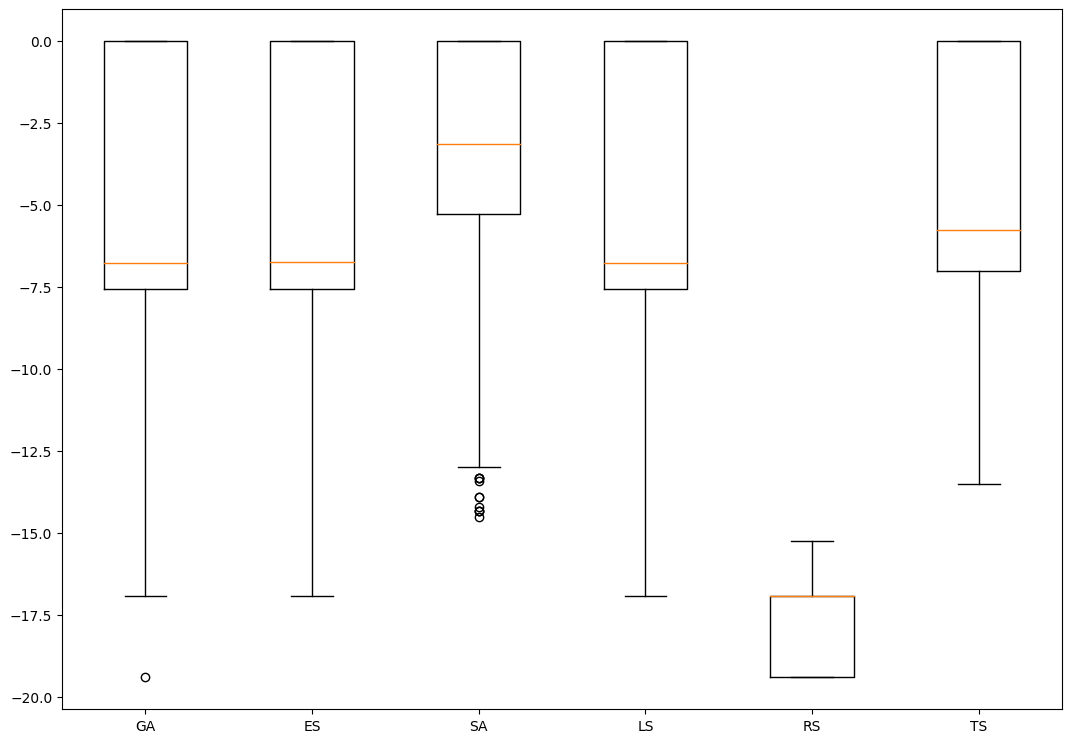

In [119]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
data = [
    solutions_array(Solutions_GA),
    solutions_array(Solutions_ES),
    solutions_array(Solutions_SA),
    solutions_array(Solutions_LS),
    solutions_array(Solutions_RS),
    solutions_array(Solutions_TS)
]


fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['GA', 'ES','SA', 'LS','RS','TS'])

# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()


In [131]:
def contains_all_ones(milestones, solution):
    for i in range(len(milestones)):
        if milestones[i] == 1 and solution[i] != 1:
            return 0
    return 1

In [139]:
def avg_array(Algorithm_solution):
    zero_arr = [0] * 2772
    for solution in Algorithm_solution:
        for j, value in enumerate(solution.variables[0]):
            zero_arr[j] += value
    
    avg_arr = [1 if x > 250 else 0 for x in zero_arr]
    return avg_arr

In [126]:
milestone_array = [[1 if j in i.columns else 0 for j in full_column_array] for i in milestones ]

In [133]:
def milestones_completed(solution):
    subset_cardinality = 0
    for i in milestone_array:
        subset_cardinality += contains_all_ones(i,solution)
    return subset_cardinality

In [141]:
milestones_completed(avg_array(Solutions_GA))

10

In [143]:
milestones_completed(avg_array(Solutions_ES))

9

In [142]:
milestones_completed(avg_array(Solutions_SA))

9

In [144]:
milestones_completed(avg_array(Solutions_LS))

8

In [145]:
milestones_completed(avg_array(Solutions_RS))

1

In [146]:
milestones_completed(avg_array(Solutions_TS))

9

In [182]:
GA_arr = ["DD07T.DOMVALUE_L", "USR02.MANDT", "USR02.BNAME",
"USR02.USTYP", "CDHDR.MANDANT", "CDHDR.OBJECTCLAS",
"CDHDR.OBJECTID", "CDHDR.CHANGENR", "CDHDR.USERNAME",
"CDHDR.UDATE", "CDHDR.UTIME", "CDHDR.TCODE", "CDPOS.MANDANT", "CDPOS.OBJECTCLAS", "CDPOS.OBJECTID",
"CDPOS.CHANGENR", "CDPOS.TABNAME", "CDPOS.TABKEY",
"CDPOS.FNAME", "CDPOS.CHNGIND", "CDPOS.VALUE_NEW",
"CDPOS.VALUE_OLD", "VBAP.VBELN", "VBAP.POSNR", "VBAP.ERDAT",
"VBAP.ERNAM", "VBAP.ERZET", "VBEP.MANDT", "VBEP.VBELN",
"VBEP.POSNR", "VBEP.BMENG", "LIKP.VBTYP", "VBAK.MANDT",
"VBAK.VBELN", "O2C_LIPS.VBELN", "O2C_LIPS.POSNR",
"O2C_LIPS.ERDAT", "O2C_VBFA_V.POSNV", "FPLA_FPLT.VBELN"]

ES_arr = ["DD07T.DOMNAME", "DD07T.DDLANGUAGE", "DD07T.DDTEXT", "DD07T.DOMVALUE_L", "USR02.MANDT",
           "USR02.BNAME", "USR02.USTYP", "CDHDR.MANDANT", "CDHDR.OBJECTCLAS", "CDHDR.OBJECTID", 
           "CDHDR.CHANGENR", "CDHDR.USERNAME", "CDHDR.UDATE", "CDHDR.UTIME", "CDHDR.TCODE",
             "CDPOS.MANDANT", "CDPOS.OBJECTCLAS", "CDPOS.OBJECTID", "CDPOS.CHANGENR", "CDPOS.TABNAME", 
             "CDPOS.TABKEY", "CDPOS.FNAME", "CDPOS.CHNGIND", "CDPOS.VALUE_NEW", "CDPOS.VALUE_OLD", "VBAP.VBELN",
               "VBAP.POSNR", "VBAP.ERDAT", "VBAP.ERNAM", "VBAP.ERZET", "VBEP.MANDT", "VBEP.VBELN", "VBEP.BMENG", 
               "LIKP.MANDT", "LIKP.VBELN", "LIKP.ERNAM", "LIKP.VBTYP", "LIKP.TCODE", "VBAK.MANDT", "VBAK.VBELN", 
               "O2C_LIPS.MANDT", "O2C_LIPS.VBELN", "O2C_LIPS.POSNR", "O2C_LIPS.ERZET", "O2C_LIPS.ERDAT", "O2C_VBFA_V.MANDT",
                 "O2C_VBFA_V.VBELV", "O2C_VBFA_V.POSNV", "FPLA_FPLT.VBELN"]


SA_arr = ["DD07T.DOMNAME", "DD07T.DDLANGUAGE", "DD07T.DDTEXT", "DD07T.DOMVALUE_L", "USR02.MANDT",
           "USR02.BNAME", "USR02.USTYP", "CDHDR.MANDANT", "CDHDR.OBJECTCLAS", "CDHDR.OBJECTID", 
           "CDHDR.CHANGENR", "CDHDR.USERNAME", "CDHDR.UDATE", "CDHDR.UTIME", "CDHDR.TCODE", "CDPOS.MANDANT", 
           "CDPOS.OBJECTCLAS", "CDPOS.OBJECTID", "CDPOS.CHANGENR", "CDPOS.TABNAME", "CDPOS.TABKEY", "CDPOS.FNAME", 
           "CDPOS.CHNGIND", "CDPOS.VALUE_NEW", "CDPOS.VALUE_OLD", "VBAP.VBELN", "VBAP.POSNR", "VBAP.ERDAT", "VBAP.ERNAM", 
           "VBAP.ERZET", "VBEP.MANDT", "VBEP.VBELN", "VBEP.POSNR", "VBEP.BMENG", "VBAK.MANDT", "VBAK.VBELN", "O2C_LIPS.MANDT",
             "O2C_LIPS.VBELN", "O2C_LIPS.POSNR", "O2C_LIPS.ERZET", "O2C_LIPS.ERDAT", "O2C_VBFA_V.MANDT", "O2C_VBFA_V.VBELV", "O2C_VBFA_V.POSNV",
            "FPLA_FPLT.VBELN"]

SA_arr_v2 = ['DD07T.DOMNAME', 'DD07T.DDLANGUAGE', 'DD07T.DDTEXT', 'DD07T.DOMVALUE_L', 'USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP', 'CDHDR.MANDANT', 
             'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.USERNAME', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.TCODE', 'CDPOS.MANDANT',
               'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR', 'CDPOS.TABNAME', 'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND', 'CDPOS.VALUE_NEW',
                 'CDPOS.VALUE_OLD', 'VBAP.VBELN', 'VBAP.POSNR', 'VBAP.ERDAT', 'VBAP.ERNAM', 'VBAP.ERZET',
                   'VBEP.MANDT', 'VBEP.VBELN', 'VBEP.POSNR', 'VBEP.BMENG', 'LIKP.MANDT', 'LIKP.VBELN', 'LIKP.ERNAM',
                     'LIKP.VBTYP', 'LIKP.TCODE', 'VBAK.MANDT', 'VBAK.VBELN', 'O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR',
                       'O2C_LIPS.ERZET', 'O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV', 'FPLA_FPLT.VBELN']

LS_arr = ["USR02.MANDT", "USR02.BNAME", "USR02.USTYP", "CDHDR.MANDANT", "CDHDR.OBJECTCLAS",
              "CDHDR.OBJECTID", "CDHDR.CHANGENR", "CDHDR.USERNAME", "CDHDR.UDATE", "CDHDR.UTIME", 
              "CDHDR.TCODE", "CDPOS.MANDANT", "CDPOS.OBJECTCLAS", "CDPOS.OBJECTID", "CDPOS.CHANGENR"
              , "CDPOS.TABNAME", "CDPOS.TABKEY", "CDPOS.FNAME", "CDPOS.CHNGIND", "CDPOS.VALUE_NEW",
                "CDPOS.VALUE_OLD", "VBAP.VBELN", "VBAP.POSNR", "VBAP.ERDAT", "VBAP.ERNAM", "VBAP.ERZET",
                  "VBEP.MANDT", "VBEP.VBELN", "VBEP.POSNR", "VBEP.BMENG", "LIKP.VBTYP", "VBAK.MANDT", "VBAK.VBELN", 
                  "O2C_LIPS.MANDT", "FPLA_FPLT.VBELN"]

RS_arr = ['USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP', 'VBAP.POSNR', 'VBAP.ERDAT', 'VBAP.ERNAM', 'VBAP.ERZET', 'VBAK.MANDT', 'VBAK.VBELN']

TS_arr = ['DD07T.DOMNAME', 'DD07T.DDLANGUAGE', 'DD07T.DDTEXT', 'DD07T.DOMVALUE_L', 'USR02.MANDT', 'USR02.BNAME', 'USR02.USTYP', 'CDHDR.MANDANT', 'CDHDR.OBJECTCLAS', 'CDHDR.OBJECTID', 'CDHDR.CHANGENR', 'CDHDR.USERNAME', 'CDHDR.UDATE', 'CDHDR.UTIME', 'CDHDR.TCODE', 'CDPOS.MANDANT', 'CDPOS.OBJECTCLAS', 'CDPOS.OBJECTID', 'CDPOS.CHANGENR', 'CDPOS.TABNAME', 'CDPOS.TABKEY', 'CDPOS.FNAME', 'CDPOS.CHNGIND', 'CDPOS.VALUE_NEW', 'CDPOS.VALUE_OLD', 'VBAP.VBELN', 'VBAP.POSNR', 'VBAP.ERDAT', 'VBAP.ERNAM', 'VBAP.ERZET', 'VBEP.MANDT', 'VBEP.VBELN', 'VBEP.POSNR', 'VBEP.BMENG', 'LIKP.MANDT', 'LIKP.VBELN', 'LIKP.ERNAM', 'LIKP.VBTYP', 'LIKP.TCODE', 'VBAK.MANDT', 'VBAK.VBELN', 'O2C_LIPS.MANDT', 'O2C_LIPS.VBELN', 'O2C_LIPS.POSNR', 'O2C_LIPS.ERZET', 'O2C_LIPS.ERDAT', 'O2C_VBFA_V.MANDT', 'O2C_VBFA_V.VBELV', 'O2C_VBFA_V.POSNV']



In [172]:
len(LS_arr)

35

In [183]:
milestones_completed([1 if item in GA_arr else 0 for item in full_column_array])

9

In [181]:
milestones_completed([1 if item in ES_arr else 0 for item in full_column_array])

9

In [161]:
milestones_completed([1 if item in SA_arr else 0 for item in full_column_array])

9

In [171]:
milestones_completed([1 if item in LS_arr else 0 for item in full_column_array])

9

In [177]:
milestones_completed([1 if item in RS_arr else 0 for item in full_column_array])

1

In [179]:
milestones_completed([1 if item in TS_arr else 0 for item in full_column_array])

9